In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

spam_data = pd.read_excel('spam.xlsx',dtype={'label': str, 'message': str})

In [2]:
spam_data = spam_data[['v1','v2']]

In [3]:
spam_data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5560,spam,This is the 2nd time we have tried 2 contact u...
5561,ham,Will М_ b going to esplanade fr home?
5562,ham,"Pity, * was in mood for that. So...any other s..."
5563,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Заменяем 'ham"""' на 'ham' в столбце 'label'
spam_data['v1'] = spam_data['v1'].replace('ham"""', 'ham')


In [5]:
df = spam_data
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
df['v1']

0       0
1       0
2       1
3       0
4       0
       ..
5560    1
5561    0
5562    0
5563    0
5564    0
Name: v1, Length: 5565, dtype: int64

In [6]:
#rename cols
df.rename(columns={'v1':'output','v2':'sms/email'},inplace=True)
df

,output,sms/email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5560,1,This is the 2nd time we have tried 2 contact u...
5561,0,Will М_ b going to esplanade fr home?
5562,0,"Pity, * was in mood for that. So...any other s..."
5563,0,The guy did some bitching but I acted like i'd...


In [7]:
spam_data.dropna(inplace=True)

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NetDriver\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
df['num_of_chars']=df['sms/email'].astype(str).apply(len)
df

,output,sms/email,num_of_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5560,1,This is the 2nd time we have tried 2 contact u...,161
5561,0,Will М_ b going to esplanade fr home?,37
5562,0,"Pity, * was in mood for that. So...any other s...",57
5563,0,The guy did some bitching but I acted like i'd...,125


In [10]:
# Tokenize the 'sms' (get each word individually ),count these words
tokenized_sms = []
length_of_sms = []

for sms in df['sms/email'].astype(str):
    tokens = nltk.word_tokenize(sms)
    tokenized_sms.append(tokens)
    length_of_sms.append(len(tokens))


df['tokenized_sms'] = tokenized_sms
df['num_of_words'] = length_of_sms

df.head()

,output,sms/email,num_of_chars,tokenized_sms,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15


In [11]:
from nltk.tokenize import sent_tokenize

#get num of sentence in each sms

num_sentences = []

for sms in df['sms/email'].astype(str):
    sentences = sent_tokenize(sms)
    num_sentences.append(len(sentences))


df['num_of_sent'] = num_sentences

df.head()

,output,sms/email,num_of_chars,tokenized_sms,num_of_words,num_of_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1


In [12]:
#describe these 3 cols to get more info 

df[['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,5562.000000,5562.000000,5562.000000
mean,76.561129,17.638979,1.948939
std,55.749223,12.322650,1.389424
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,58.000000,14.000000,1.000000
75%,115.000000,26.000000,2.000000
max,910.000000,196.000000,18.000000


In [13]:
# describe these cols for ham sms/email
df[df['output']==0][['num_of_chars','num_of_words','num_of_sent']].describe()

,num_of_chars,num_of_words,num_of_sent
count,4816.000000,4816.000000,4816.000000
mean,66.931478,16.055233,1.783846
std,52.571600,12.218445,1.290430
min,2.000000,1.000000,1.000000
25%,32.000000,8.000000,1.000000
50%,50.000000,12.000000,1.000000
75%,87.000000,21.000000,2.000000
max,910.000000,196.000000,18.000000


c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


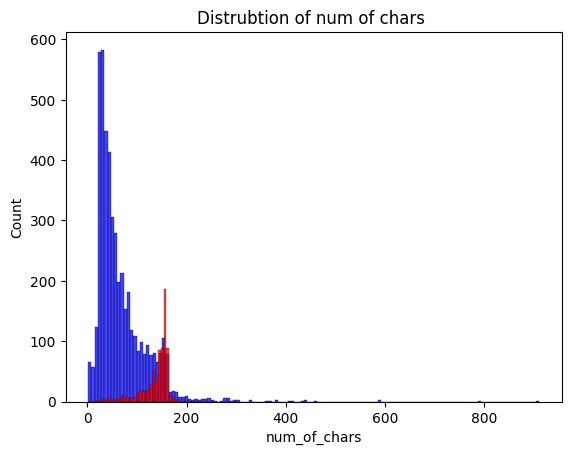

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df[df['output']==0]['num_of_chars'],color='blue')
sns.histplot(df[df['output']==1]['num_of_chars'],color='red')
plt.title('Distrubtion of num of chars ')
plt.show()

c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


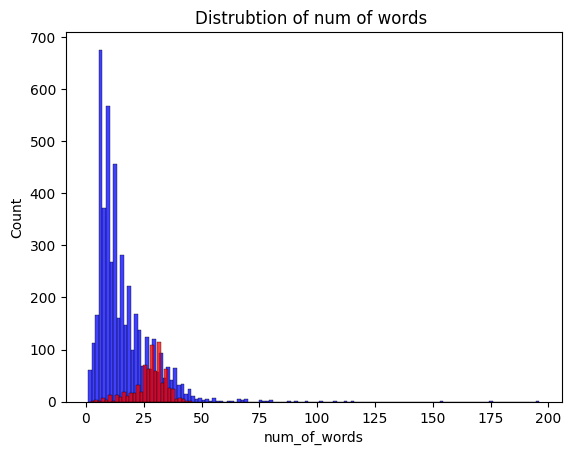

In [15]:
import seaborn as sns
sns.histplot(df[df['output']==0]['num_of_words'],color='blue')
sns.histplot(df[df['output']==1]['num_of_words'],color='red')
plt.title('Distrubtion of num of words ')
plt.show()

c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


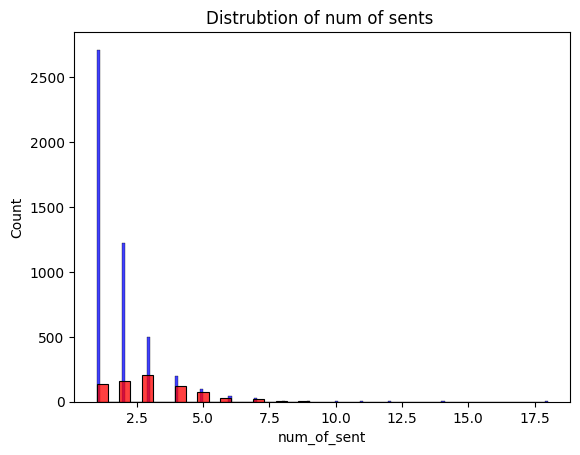

In [16]:
import seaborn as sns
sns.histplot(df[df['output']==0]['num_of_sent'],color='blue')
sns.histplot(df[df['output']==1]['num_of_sent'],color='red')
plt.title('Distrubtion of num of sents ')
plt.show()

In [17]:
df2=df[['output','num_of_chars','num_of_words','num_of_sent']]
df2

,output,num_of_chars,num_of_words,num_of_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5560,1,161,35,4
5561,0,37,9,1
5562,0,57,15,2
5563,0,125,27,1


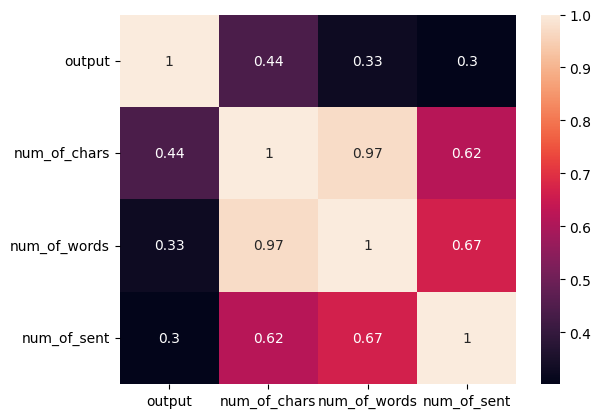

In [18]:
sns.heatmap(df2.corr(),annot=True)
plt.show()

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NetDriver\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
def process_txt(txt):
    txt=txt.lower() # cvt all sms to lower casechase letters
    txt=nltk.word_tokenize(txt)
    
    y=[]
    for i in txt: #include nums
        if i.isalnum()==True:
            y.append(i)
    txt=y[:]
    y.clear()
    
    for i in txt:
        if i not in stopwords.words('english')and i not in string.punctuation: # ignore stopwords & punctuation
            y.append(i)
    txt=y[:]
    y.clear()
    for i in txt:
        y.append(ps.stem(i)) #get stemming
    
    
    return " ".join(y)

In [23]:
txt="hello 20 %"
process_txt(txt)

'hello 20'

In [24]:
print(df['sms/email'][2000])
print('_'*100)
print(process_txt(df['sms/email'][2000]))

Idea will soon get converted to live:)
____________________________________________________________________________________________________
idea soon get convert live


In [25]:
#apply fun to all data 
df['text_transform']=df['sms/email'].astype(str).apply(process_txt)
df

,output,sms/email,num_of_chars,tokenized_sms,num_of_words,num_of_sent,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,nah think goe usf live around though
...,...,...,...,...,...,...,...
5560,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4,2nd time tri 2 contact u еј750 pound prize 2 c...
5561,0,Will М_ b going to esplanade fr home?,37,"[Will, М_, b, going, to, esplanade, fr, home, ?]",9,1,b go esplanad fr home
5562,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2,piti mood suggest
5563,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1,guy bitch act like interest buy someth els nex...


In [26]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,min_word_length=4,background_color='black')

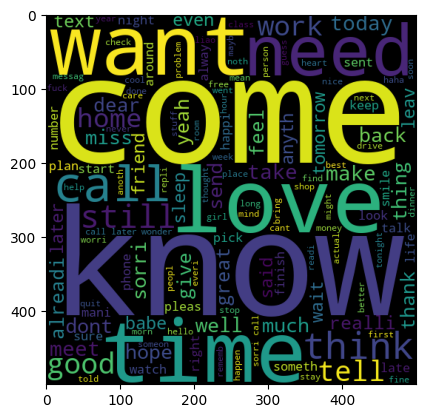

In [27]:
# get the most frequently ham words
ham_words=wc.generate(df[df['output']==0]['text_transform'].str.cat(sep=" "))
plt.imshow(ham_words)
plt.show()

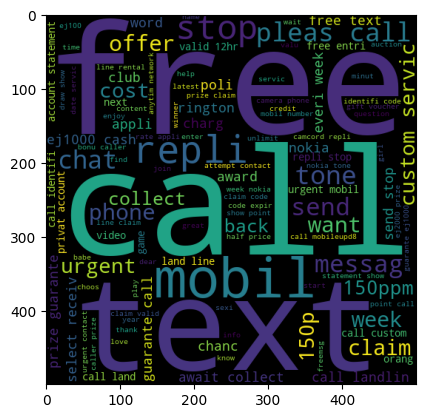

In [28]:
# get the most frequently spam words
spam_words=wc.generate(df[df['output']==1]['text_transform'].str.cat(sep=" "))
plt.imshow(spam_words)
plt.show()

In [29]:
spam_corpus=[]
for msg in df[df['output']==1]['text_transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        
        
# get the 50 most frequent words in spam emails/SMS
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,363
1,free,219
2,2,173
3,txt,169
4,ur,143
5,u,141
6,text,139
7,mobil,134
8,4,120
9,claim,115


In [30]:
ham_corpus=[]
for msg in df[df['output']==0]['text_transform'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
        
# get the 50 most frequent words in ham emails/SMS        
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,926
1,go,409
2,get,336
3,come,287
4,call,282
5,2,277
6,ok,241
7,lt,239
8,got,237
9,know,237


In [76]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

#feature selection
X = tfidf.fit_transform(df['text_transform']).toarray()
y=df['output'].values

In [77]:
from sklearn.model_selection import train_test_split 

#splitting
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=1,stratify=y,shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (4449, 3000)
Shape of y_train: (4449,)
Shape of X_test: (1113, 3000)
Shape of y_test: (1113,)


In [78]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

0.8526504941599281
[[820 144]
 [ 20 129]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       964
           1       0.47      0.87      0.61       149

    accuracy                           0.85      1113
   macro avg       0.72      0.86      0.76      1113
weighted avg       0.91      0.85      0.87      1113



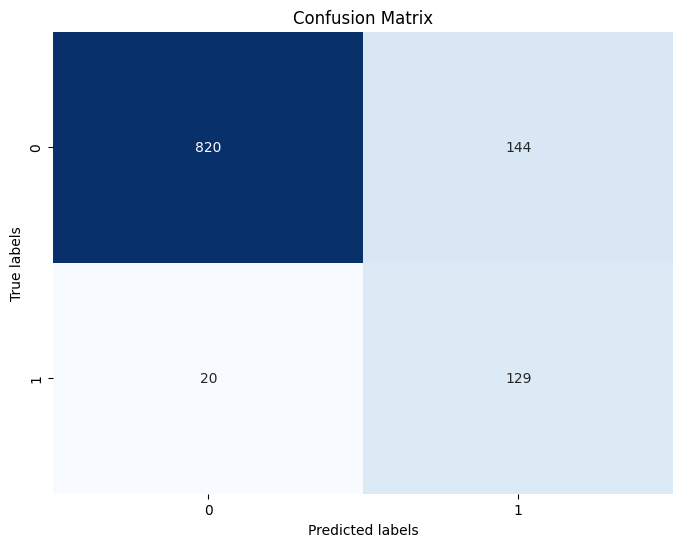

In [79]:
import sys
sys.executable

gnb=GaussianNB()

gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_gnb))

cm = confusion_matrix(y_test, y_pred_gnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

0.9784366576819407
[[964   0]
 [ 24 125]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       964
           1       1.00      0.84      0.91       149

    accuracy                           0.98      1113
   macro avg       0.99      0.92      0.95      1113
weighted avg       0.98      0.98      0.98      1113



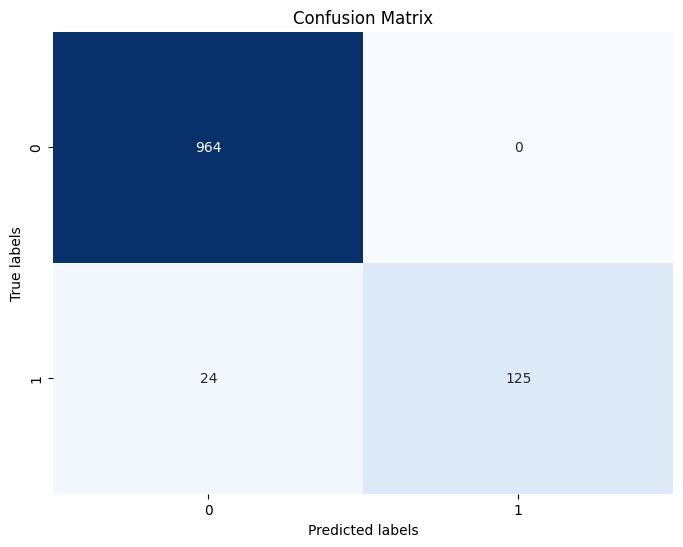

In [80]:
mnb=MultinomialNB()

mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(classification_report(y_test,y_pred_mnb))

cm = confusion_matrix(y_test, y_pred_mnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

0.9784366576819407
[[960   4]
 [ 20 129]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       964
           1       0.97      0.87      0.91       149

    accuracy                           0.98      1113
   macro avg       0.97      0.93      0.95      1113
weighted avg       0.98      0.98      0.98      1113



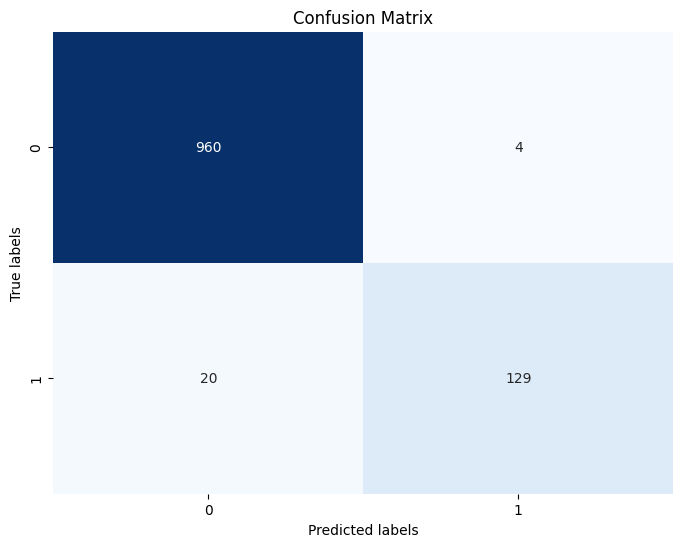

In [81]:
bnb=BernoulliNB()


bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

cm = confusion_matrix(y_test, y_pred_bnb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
#saving the model
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

NameError: name 'naive_bayes' is not defined

In [83]:
df

,output,sms/email,num_of_chars,tokenized_sms,num_of_words,num_of_sent,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,1,nah think goe usf live around though
...,...,...,...,...,...,...,...
5560,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",35,4,2nd time tri 2 contact u еј750 pound prize 2 c...
5561,0,Will М_ b going to esplanade fr home?,37,"[Will, М_, b, going, to, esplanade, fr, home, ?]",9,1,b go esplanad fr home
5562,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",15,2,piti mood suggest
5563,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",27,1,guy bitch act like interest buy someth els nex...


In [64]:
print(len(df.drop('output', axis=1)), len(df['output']))

5562 5562


(5562, 6)
(5562,)


In [85]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline


# Создание пайплайнов для каждой модели
pipeline_lr = Pipeline([
    
    ('clf', LogisticRegression())
])

pipeline_nb = Pipeline([
    
    ('clf', MultinomialNB())
])

pipeline_rf = Pipeline([
  
    ('clf', RandomForestClassifier())
])

param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear', 'saga']
}

param_grid_nb = {
    'clf__alpha': [0.1, 0.5, 1, 2, 5, 10]
}

param_grid_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10]
}

# GridSearchCV для каждой модели
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='f1', error_score='raise')
grid_nb = GridSearchCV(pipeline_nb, param_grid_nb, cv=5, scoring='f1', error_score='raise')
grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1', error_score='raise')

# Обучение моделей
try:
    grid_lr.fit(X_train, y_train)
except Exception as e:
    print(f"Logistic Regression training failed: {e}")

try:
    grid_nb.fit(X_train, y_train)
except Exception as e:
    print(f"Naive Bayes training failed: {e}")

try:
    grid_rf.fit(X_train, y_train)
except Exception as e:
    print(f"Random Forest training failed: {e}")

# Получение лучших моделей после настройки
best_lr = grid_lr.best_estimator_ if grid_lr.best_estimator_ else None
best_nb = grid_nb.best_estimator_ if grid_nb.best_estimator_ else None
best_rf = grid_rf.best_estimator_ if grid_rf.best_estimator_ else None

# Предсказания на наборе данных для оценки
if best_lr:
    y_pred_lr = best_lr.predict(X_test)
if best_nb:
    y_pred_nb = best_nb.predict(X_test)
if best_rf:
    y_pred_rf = best_rf.predict(X_test)

# Функция для вывода метрик
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, pos_label=1)
    recall = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

# Печать метрик для каждой модели
if best_lr:
    print_metrics(y_test, y_pred_lr, "Logistic Regression")
if best_nb:
    print_metrics(y_test, y_pred_nb, "Naive Bayes")
if best_rf:
    print_metrics(y_test, y_pred_rf, "Random Forest")


c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\NetDriver\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reac

Logistic Regression Metrics:
Accuracy: 0.9829
Precision: 0.9851
Recall: 0.8859
F1 Score: 0.9329

Naive Bayes Metrics:
Accuracy: 0.9811
Precision: 0.9706
Recall: 0.8859
F1 Score: 0.9263

Random Forest Metrics:
Accuracy: 0.9802
Precision: 1.0000
Recall: 0.8523
F1 Score: 0.9203

